In [2]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt

/home/ym/.conda/envs/noise/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


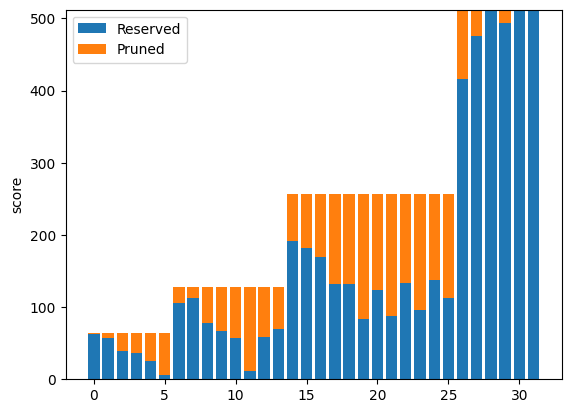

In [13]:
scores_list, threshold = torch.load(
    "../datasets/importance_scores.pth", map_location="cpu"
)

layer_indices = list(range(len(scores_list)))
num_filters_reserved = []
num_filters_pruned = []

for idx, scores in enumerate(scores_list):
    # print("scores", scores.shape)
    valid_mask = scores > threshold
    # print((~valid_mask).sum().item())

    assert (valid_mask.sum().item() + (~valid_mask).sum().item()) == scores.shape[0]

    num_filters_reserved.append(valid_mask.sum().item())
    num_filters_pruned.append((~valid_mask).sum().item())

fig, ax = plt.subplots()

ax.bar(layer_indices, num_filters_reserved, label="Reserved")
ax.bar(layer_indices, num_filters_pruned, bottom=num_filters_reserved, label="Pruned")
ax.set_ylabel("score")
ax.legend()

plt.show()